Importing the required libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Analysis

In [178]:
# Loading the data into pandas dataframe 
flight_train_dataset = pd.read_excel('/content/drive/MyDrive/Datasets/flight price/flight_Train.xlsx')

In [179]:
# first five rows of the dataset
flight_train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [180]:
# loading the test data into pandas dataframe
flight_test_dataset = pd.read_excel('/content/drive/MyDrive/Datasets/flight price/flight_Test_set.xlsx')

In [181]:
# first five rows of the dataset
flight_test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [182]:
# merging the train and test both the dataset
final_dataset = flight_train_dataset.append(flight_test_dataset)

In [183]:
# first five rows of the dataset
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.00
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.00
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.00


In [184]:
# total number of rows and columns
final_dataset.shape

(13354, 11)

In [185]:
# getting the information of the data
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [186]:
# statistical measures of the dataset
final_dataset.describe()

,Price
count,10683.00
mean,9087.06
std,4611.36
min,1759.00
25%,5277.00
50%,8372.00
75%,12373.00
max,79512.00


Data Preparation

Handling the missing values


In [187]:
#checking the missing values in the dataset
final_dataset.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [188]:
(final_dataset.isnull().sum()/final_dataset.shape[0])*100

Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price             20.00
dtype: float64

In [189]:
final_dataset.dropna(inplace=True)

In [190]:
final_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Handling the Date and Time

In [191]:
final_dataset['Date_of_Journey'].str.split('/')[0]

['24', '03', '2019']

In [192]:
# from 'Date_of_Journey' separating date month and year
# final_dataset['Date'] = final_dataset['Date_of_Journey'].str.split('/').str[0]
# final_dataset['Month'] = final_dataset['Date_of_Journey'].str.split('/').str[1]
# final_dataset['Year'] = final_dataset['Date_of_Journey'].str.split('/').str[2]



# We can use lambda function also
final_dataset['Date'] = final_dataset['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_dataset['Month'] = final_dataset['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_dataset['Year'] = final_dataset['Date_of_Journey'].apply(lambda x:x.split('/')[2])


In [193]:
final_dataset['Date'] = final_dataset['Date'].astype(int)
final_dataset['Month'] = final_dataset['Month'].astype(int)
final_dataset['Year'] = final_dataset['Date'].astype(int)

In [194]:
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.00,24,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.00,1,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.00,9,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.00,12,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.00,1,3,1


In [195]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             10682 non-null  int64  
 12  Month            10682 non-null  int64  
 13  Year             10682 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [196]:
# dropping the column date_of_journey
final_dataset.drop('Date_of_Journey', axis=1, inplace=True)

In [197]:
#final_dataset['Arrival_Time'].str.split(' ')
# using lambda function also
final_dataset['Arrival_Time']= final_dataset['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [198]:
# checking the null values 
final_dataset.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [199]:
final_dataset['Arrival_hour'] = final_dataset['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_dataset['Arrival_min'] = final_dataset['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [200]:
final_dataset.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.00,24,3,24,01,10


In [201]:
final_dataset['Arrival_hour'] = final_dataset['Arrival_hour'].astype(int)
final_dataset['Arrival_min'] = final_dataset['Arrival_min'].astype(int)

In [202]:
final_dataset.drop('Arrival_Time',axis=1,inplace=True)

In [203]:
final_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.00,24,3,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.00,1,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.00,9,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.00,12,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.00,1,3,1,21,35


In [204]:
final_dataset['Dept_hour'] = final_dataset['Dep_Time'].str.split(':').str[0]
final_dataset['Dept_min'] = final_dataset['Dep_Time'].str.split(':').str[1]
final_dataset['Dept_hour'] = final_dataset['Dept_hour'].astype(int)
final_dataset['Dept_min'] = final_dataset['Dept_min'].astype(int)
final_dataset.drop('Dep_Time', axis=1, inplace=True)

In [205]:
final_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  object 
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int64  
 9   Month            10682 non-null  int64  
 10  Year             10682 non-null  int64  
 11  Arrival_hour     10682 non-null  int64  
 12  Arrival_min      10682 non-null  int64  
 13  Dept_hour        10682 non-null  int64  
 14  Dept_min         10682 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [206]:
# FOR 'Duration' columns this columns contain hour and minute both
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins


In [207]:
final_dataset['Duration_hours']=final_dataset.Duration.apply(lambda x:get_duration(x)[0])
final_dataset['Duration_mins']=final_dataset.Duration.apply(lambda x:get_duration(x)[1])
final_dataset.drop(["Duration"], axis = 1, inplace = True)

Handling Categorical data

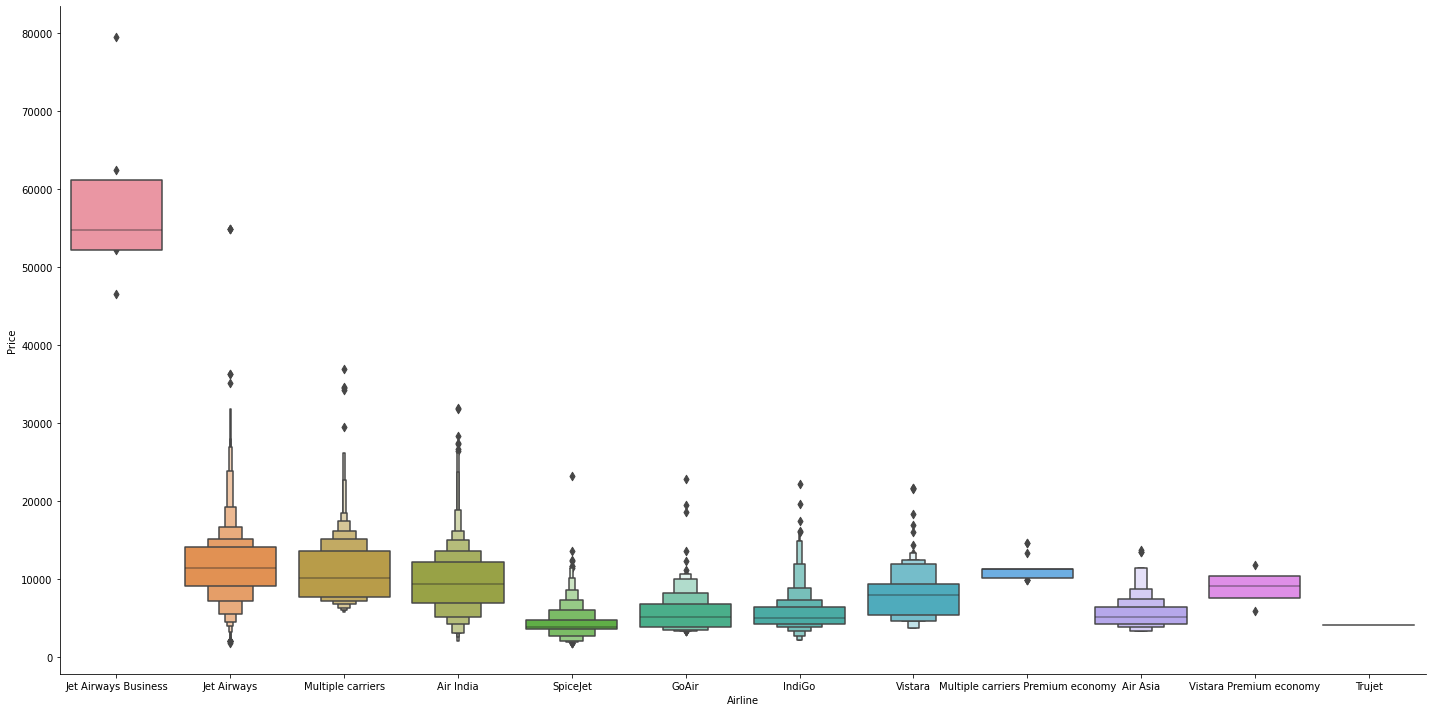

In [208]:
# Making a plot between 'Airline' and 'Price' 
sns.set
sns.catplot(x='Airline',y='Price', data=final_dataset.sort_values("Price",ascending =False), kind='boxen',height=10,aspect=2)
plt.show()

As we can see the name of the Airline matters. 'JetAirwaysBusiness' has the highest price range. Other airline price also varies.

Since the Airline variable Nominal Categorical Data (There is no order of any kind in airline names) we will use one-hot encoding to handle this variable.

In [209]:
Airline = final_dataset[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


One-hot encoded 'Airline' data is saved in the Airline variable as shown in the above code.

'Source' and 'Destination' variables are nominal Categorical data. for these variable we also use one-hot encoding.  

In [210]:
# for Source Features
Source = final_dataset[['Source']]
Source = pd.get_dummies(Source, drop_first= True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [211]:
# For Destinaton Feature
Destination = final_dataset[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


Route Feature:

Route represents the path of the Journey.Since the 'Total_Stops' features capture information if flight is direct or connected.

In [212]:
final_dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [213]:
final_dataset['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [214]:
final_dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.00,24,3,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.00,1,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.00,9,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.00,12,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.00,1,3,1,21,35,16,50,4,45


In [215]:
final_dataset.drop('Route', axis=1,inplace=True)

In [216]:
final_dataset['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [217]:
final_dataset['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [218]:
final_dataset['Additional_Info'].value_counts()

No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [219]:
add_info = final_dataset[['Additional_Info']]
add_info = pd.get_dummies(add_info, drop_first=True)

Now concatenating all the One-hot and label-encoded features to the original dataframe.

In [220]:
final_dataset = pd.concat([final_dataset, Airline, Source, Destination, add_info], axis=1)
final_dataset.drop(['Airline','Source','Destination','Additional_Info'], axis=1, inplace=True)

In [221]:
final_dataset.shape[1]

39

In [222]:
final_dataset.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dept_hour', 'Dept_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye f

Model Building

split the features and target

In [223]:
X = final_dataset.drop('Price',axis=1)
Y = final_dataset['Price']

Splitting the data into train and test data

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [225]:
print(X.shape,X_train.shape, X_test.shape)

(10682, 38) (8545, 38) (2137, 38)


Applying Lazy Prediction



In [226]:
from lazypredict.Supervised import LazyRegressor
reg =  LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train,X_test,Y_train,Y_test)
models.head(10)

100%|██████████| 42/42 [01:24<00:00,  2.02s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.92,1330.96,2.85
XGBRegressor,0.91,0.91,1398.72,1.40
RandomForestRegressor,0.88,0.88,1618.41,3.44
LGBMRegressor,0.87,0.87,1642.97,0.27
HistGradientBoostingRegressor,0.87,0.87,1643.46,1.00
BaggingRegressor,0.87,0.87,1679.43,0.42
DecisionTreeRegressor,0.84,0.85,1823.97,0.12
KNeighborsRegressor,0.84,0.84,1835.08,1.77
ExtraTreeRegressor,0.83,0.84,1879.51,0.08


Here ‘XGBRegressor’ and ‘ExtraTreesRegressor’ outperform other models significantly. It does take a high amount of training time with respect to other models. At this step we can choose priority either we want ‘time’ or ‘performance’.

Model Training

In [227]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [228]:
model.fit(X_train,Y_train)

ExtraTreesRegressor()

Let's check Model Performance

In [229]:
y_pred = model.predict(X_test)
training_score = model.score(X_train,Y_train)
print(f"Training Score : {training_score}")

Training Score : 0.9955077608985298


In [230]:
test_score = model.score(X_test,Y_test)
print(f"Test : {test_score}")

Test : 0.9158931670693111


Model Score is pretty Good. let's visualize the results of few predictions.

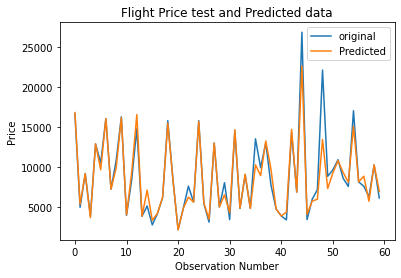

In [231]:
number_of_observations = 60

x = range(len(Y_test[:number_of_observations]))

plt.plot(x, Y_test[:number_of_observations], label="original")

plt.plot(x, y_pred[:number_of_observations], label="Predicted")

plt.title("Flight Price test and Predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

As we can observe in the above figure, model predictions and original prices are overlapping. This visual result confirms the high model score which we saw Model building and Model Training.

In this Flight Pirce Prdiction problem we have Lazy pridiction library. Lazy Prediction library saves time and efforts to build a machine learning model by providing model performance and training time. One can choose either based on the situation at hand.


Thank you